In [1]:
import numpy as np
import pandas as pd
import pyproj
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from pysheds.grid import Grid

%matplotlib inline

# Generate grid and delineate catchment

In [2]:
grid = Grid.from_raster('../data/n30w100_con',
                        data_name='dem', input_type='ascii')

grid.read_raster('../data/n30w100_dir',
                 data_name='dir', input_type='ascii')

In [3]:
         #N    NE    E    SE    S    SW    W    NW
dirmap = (64,  128,  1,   2,    4,   8,    16,  32)

In [4]:
# Specify pour point
x, y = -97.2937, 32.7371

# Delineate the catchment
grid.catchment(x, y, dirmap=dirmap, out_name='catch',
               recursionlimit=15000, xytype='label')

In [5]:
grid.clip_to('catch', precision=5)

Unalignable bbox provided: [-97.4025   32.60667 -97.26167  32.73917].
Rounding to [-97.4025      32.60666667 -97.26166667  32.73916667]


In [6]:
catch = grid.view('catch')

# Convert grid coordinate reference system

In [7]:
# WGS 84: Geographic
old_crs = pyproj.Proj('+init=epsg:4326')

# NAD83 / Texas Centric Albers Equal Area: Projected
new_crs = pyproj.Proj('+init=epsg:3083')

In [8]:
grid.to_crs(new_crs)

# View catchment in converted CRS

In [9]:
projected_catch, projected_coords = grid.view('catch', return_coords=True)

In [10]:
# Make sure grid elements are still the same
np.allclose(catch, projected_catch)

True

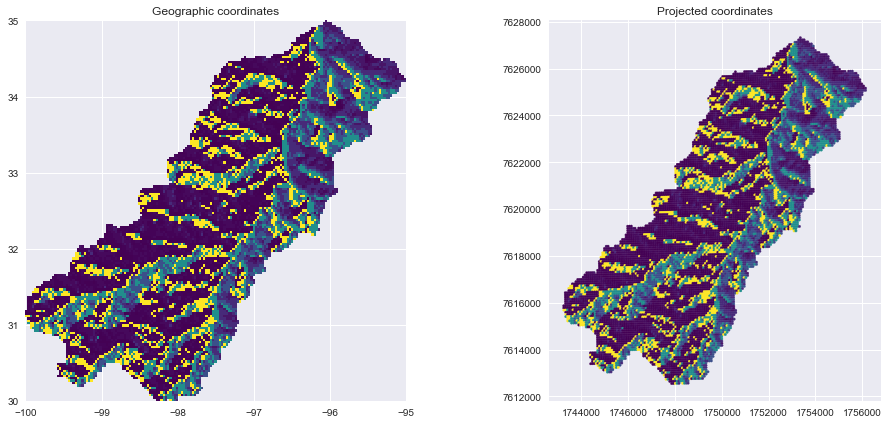

In [11]:
# Plot the catchment
image_arr = np.where(catch, catch, np.nan)
image_arr2 = np.where(projected_catch, projected_catch, np.nan)

fig, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].set_aspect('equal')
plt.grid('on', zorder=0)
bbox = grid.grid_props['catch']['bbox']
extent = (bbox[0], bbox[2], bbox[1], bbox[3])
im = ax[0].imshow(image_arr, extent=extent, zorder=1, cmap='viridis')
ax[0].set_title('Geographic coordinates')

ax[1].set_aspect('equal')
sc = ax[1].scatter(projected_coords[:,1], projected_coords[:,0], c=image_arr2.ravel(), s=6, cmap='viridis')
ax[1].set_title('Projected coordinates')

plt.tight_layout()